# Zillow Housing Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Loading files and getting header

In [2]:
df_city = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/City_time_series.csv")
list(df_city.columns.values)

['Date',
 'RegionName',
 'HomesSoldAsForeclosuresRatio_AllHomes',
 'InventorySeasonallyAdjusted_AllHomes',
 'InventoryRaw_AllHomes',
 'MedianListingPricePerSqft_1Bedroom',
 'MedianListingPricePerSqft_2Bedroom',
 'MedianListingPricePerSqft_3Bedroom',
 'MedianListingPricePerSqft_4Bedroom',
 'MedianListingPricePerSqft_5BedroomOrMore',
 'MedianListingPricePerSqft_AllHomes',
 'MedianListingPricePerSqft_CondoCoop',
 'MedianListingPricePerSqft_DuplexTriplex',
 'MedianListingPricePerSqft_SingleFamilyResidence',
 'MedianListingPrice_1Bedroom',
 'MedianListingPrice_2Bedroom',
 'MedianListingPrice_3Bedroom',
 'MedianListingPrice_4Bedroom',
 'MedianListingPrice_5BedroomOrMore',
 'MedianListingPrice_AllHomes',
 'MedianListingPrice_CondoCoop',
 'MedianListingPrice_DuplexTriplex',
 'MedianListingPrice_SingleFamilyResidence',
 'MedianPctOfPriceReduction_AllHomes',
 'MedianPctOfPriceReduction_CondoCoop',
 'MedianPctOfPriceReduction_SingleFamilyResidence',
 'MedianPriceCutDollar_AllHomes',
 'MedianPrice

# Sorting Year in date

In [11]:
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city['Year'] = df_city['Date'].apply(lambda x: x.year)

# Exploring median price per squarefoot of all homes

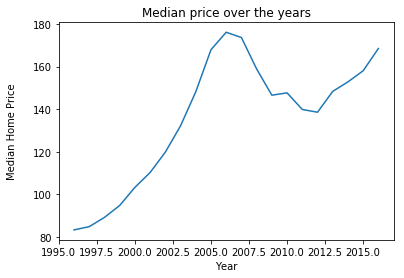

In [4]:
df_city.groupby(df_city['Year'])['MedianSoldPricePerSqft_AllHomes'].mean().plot()

plt.title('Median price over the years')
plt.ylabel('Median Home Price\n')
plt.show()

# Exploring median rental price per squartfoot of all homes

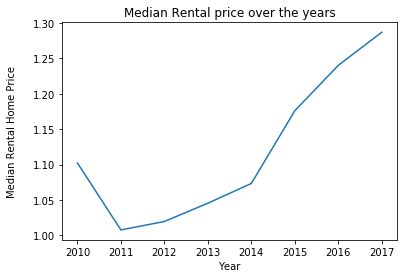

In [5]:
df_city.groupby(df_city['Year'])['MedianRentalPricePerSqft_AllHomes'].mean().plot()

plt.title('Median Rental price over the years')
plt.ylabel('Median Rental Home Price\n')
plt.show()

## The data seems to suggest that the median selling price per square foot and the median rental price per square foot decrease and rises together. Let's further explore below

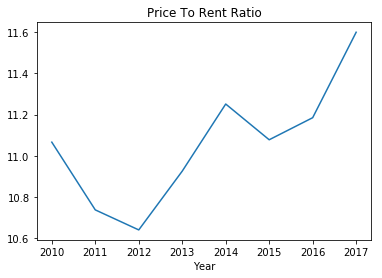

In [6]:
df_city.groupby(df_city['Year'])['PriceToRentRatio_AllHomes'].mean().plot()
plt.title('Price To Rent Ratio')
plt.show()

# Exploring changes in price for different home types

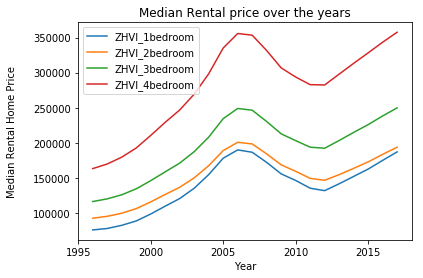

In [7]:
df_city.groupby(df_city['Year'])['ZHVI_1bedroom','ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom'].mean().plot()

plt.title('Median Rental price over the years')
plt.ylabel('Median Rental Home Price\n')
plt.show()

### The data suggests that all four categories of home rise and fall about the same

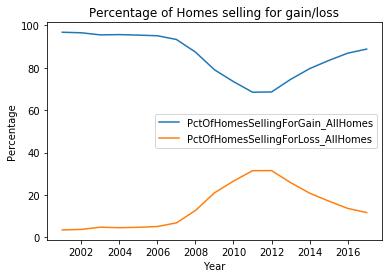

In [9]:
df_city.groupby(df_city['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean().plot()

plt.title('Percentage of Homes selling for gain/loss')
plt.ylabel('Percentage')
plt.show()

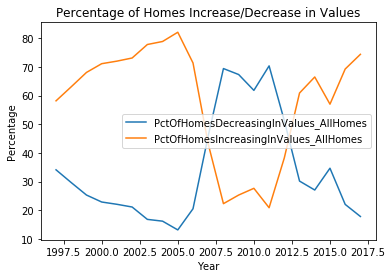

In [12]:
df_city.groupby(df_city['Year'])['PctOfHomesDecreasingInValues_AllHomes','PctOfHomesIncreasingInValues_AllHomes',].mean().plot()

plt.title('Percentage of Homes Increase/Decrease in Values')
plt.ylabel('Percentage')
plt.show()

### Data suggests that all home values start to increase after 2011. As percentage of homes increasing in value starts to rise at 2011. On the other hand, the percentage of homes decreasing in value decreases at 2011. It took around 5 years since the 2008 housing crisis for the housing market to stabilize. 